In [9]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

# 1. Forecast

In [10]:
sales_df = pd.read_csv('../prophet-quickstart/examples/example_retail_sales.csv')

sales_df['y_orig']=sales_df.y # We want to save the original data for later use
sales_df['y'] = np.log(sales_df['y']) #take the log of the data to remove trends, etc

model = Prophet()
model.fit(sales_df);

#create 12 months of future data
future_data = model.make_future_dataframe(periods=12, freq = 'm')

#forecast the data for future data
forecast_data = model.predict(future_data)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/sailyourlife/anaconda3/envs/nextopt/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


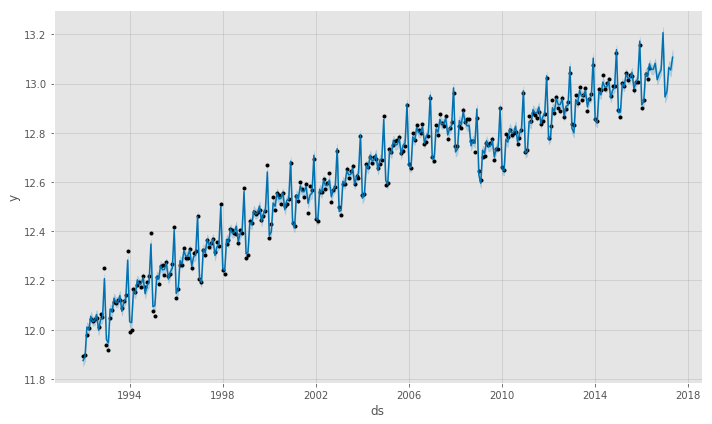

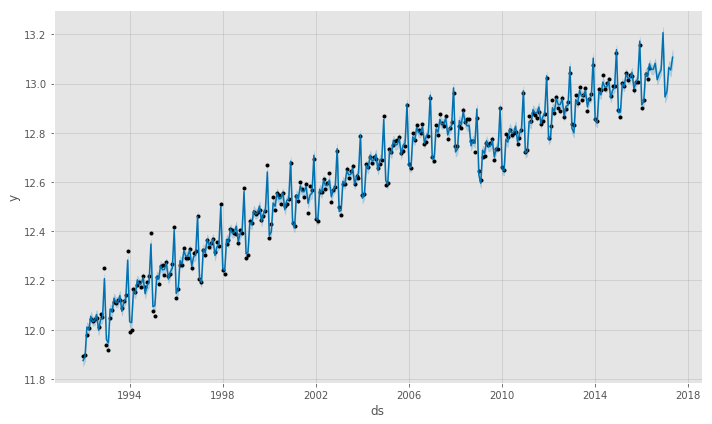

In [11]:
model.plot(forecast_data)

# 2. Merge

In [12]:
sales_df.set_index('ds', inplace=True)
forecast_data.set_index('ds', inplace=True)
viz_df = sales_df.join(forecast_data[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
del viz_df['y']

In [16]:
viz_df.tail(20)

,y_orig,yhat,yhat_lower,yhat_upper
ds,,,,
2015-10-01,444959.0,13.005320,12.987154,13.026318
2015-11-01,444507.0,13.019750,13.000214,13.040066
2015-12-01,518253.0,13.172638,13.152278,13.191759
2016-01-01,400928.0,12.913419,12.893240,12.933104
2016-02-01,413554.0,12.926206,12.905768,12.944586
2016-03-01,460093.0,13.043097,13.021502,13.062129
2016-04-01,450935.0,13.027925,13.006784,13.048526
2016-05-01,471421.0,13.080271,13.059642,13.098425
2016-05-31,NaN,13.057682,13.038185,13.076039


In [17]:
sales_df.index = pd.to_datetime(sales_df.index)
last_date = sales_df.index[-1]

# 3. 기존 데이터와 함께 PLOT하기

In [19]:
sales_df.tail()

,y,y_orig
ds,,
2016-01-01,12.901537,400928
2016-02-01,12.932543,413554
2016-03-01,13.039184,460093
2016-04-01,13.019078,450935
2016-05-01,13.063507,471421


In [20]:
from datetime import date,timedelta

def plot_data(func_df, end_date):
    end_date = end_date - timedelta(weeks=4) # find the 2nd to last row in the data. We don't take the last row because we want the charted lines to connect
    mask = (func_df.index > end_date) # set up a mask to pull out the predicted rows of data.
    predict_df = func_df.loc[mask] # using the mask, we create a new dataframe with just the predicted data.
   
    # Now...plot everything
    fig, ax1 = plt.subplots()
    ax1.plot(sales_df.y_orig)
    ax1.plot((np.exp(predict_df.yhat)), color='black', linestyle=':')
    ax1.fill_between(predict_df.index, np.exp(predict_df['yhat_upper']), np.exp(predict_df['yhat_lower']), alpha=0.5, color='darkgray')
    ax1.set_title('Sales (Orange) vs Sales Forecast (Black)')
    ax1.set_ylabel('Dollar Sales')
    ax1.set_xlabel('Date')
  
    # change the legend text
    L=ax1.legend() #get the legend
    L.get_texts()[0].set_text('Actual Sales') #change the legend text for 1st plot
    L.get_texts()[1].set_text('Forecasted Sales') #change the legend text for 2nd plot

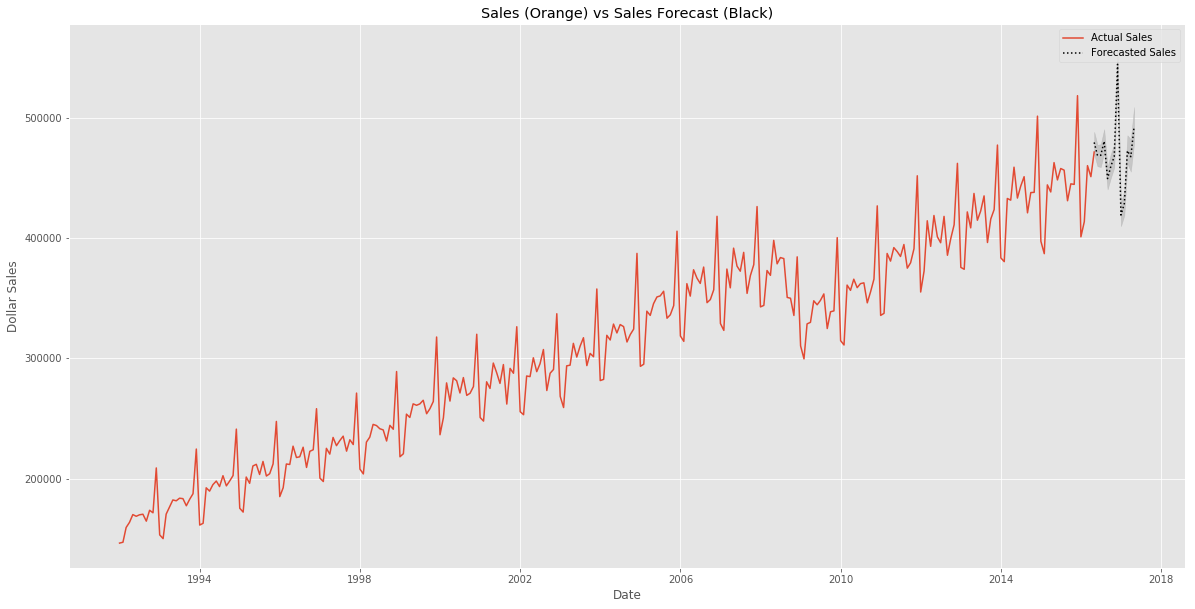

In [22]:
plot_data(viz_df, last_date)